### 2D CNN Model

In [14]:
import pandas as pd
import numpy as np

import keras
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
def Data_Prep():
    data = pd.read_csv('./2D_120.csv')

    target = data.AGE.copy(deep=True)
    data = data.drop(['Unnamed: 0','AGE'],axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
    data,target,test_size=0.2,random_state=42)

    mm = MinMaxScaler()
    X_train = mm.fit_transform(X_train)
    X_test  = mm.transform(X_test)

    X_train = X_train.reshape(X_train.shape[0], 256, 150, 1)
    X_test  = X_test.reshape(X_test.shape[0], 256, 150, 1)
    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = Data_Prep()

In [17]:
X_test.shape

(104, 256, 150, 1)

In [18]:
X_train.shape

(412, 256, 150, 1)

In [19]:
model = Sequential()

model.add(Convolution2D(filters = 15,           
                        kernel_size = (5,5),    
                        activation='relu', 
                        input_shape=X_train.shape[1:]))

model.add(MaxPooling2D())     

model.add(Convolution2D(filters =30,        
                        kernel_size = (4,4),   
                        activation='relu'))

model.add(MaxPooling2D())

model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(512, activation='relu'))     

model.add(Dense(1, activation='relu'))

model.compile(loss='mse',
              optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, mode='auto')

In [20]:
model.fit(X_train, y_train, 
          batch_size=128,
          epochs=20, 
          callbacks=[early_stop], 
          validation_data =(X_test, y_test),
          verbose=1)

Train on 412 samples, validate on 104 samples
Epoch 1/20
412/412 [==============================] - 79s 192ms/step - loss: 1741.7313 - val_loss: 1681.5364
Epoch 2/20
412/412 [==============================] - 65s 159ms/step - loss: 1038.0225 - val_loss: 988.1214
Epoch 3/20
412/412 [==============================] - 65s 159ms/step - loss: 829.9445 - val_loss: 1125.3546
Epoch 4/20
412/412 [==============================] - 66s 160ms/step - loss: 591.4027 - val_loss: 438.1211
Epoch 5/20
412/412 [==============================] - 63s 153ms/step - loss: 327.8267 - val_loss: 350.0959
Epoch 6/20
412/412 [==============================] - 62s 151ms/step - loss: 252.7391 - val_loss: 219.2149
Epoch 7/20
412/412 [==============================] - 61s 149ms/step - loss: 206.2589 - val_loss: 194.3363
Epoch 8/20
412/412 [==============================] - 62s 150ms/step - loss: 210.0951 - val_loss: 183.8748
Epoch 9/20
412/412 [==============================] - 62s 151ms/step - loss: 188.6659 - val_lo

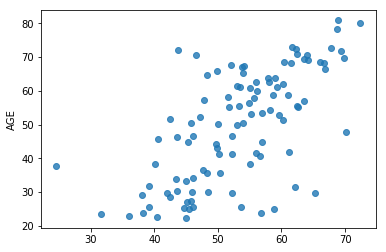

In [23]:
sns.regplot(model.predict(X_test), y_test,fit_reg=False)
#sns.plt.show()